# Riddler Classic 03/27/20

From Chris Nho comes a question of rolling (and re-rolling) a die:

You start with a fair 6-sided die and roll it six times, recording the results of each roll. You then write these numbers on the six faces of another, unlabeled fair die. For example, if your six rolls were 3, 5, 3, 6, 1 and 2, then your second die wouldn’t have a 4 on it; instead, it would have two 3s.

Next, you roll this second die six times. You take those six numbers and write them on the faces of yet another fair die, and you continue this process of generating a new die from the previous one.

Eventually, you’ll have a die with the same number on all six faces. What is the average number of rolls it will take to reach this state?

Extra credit: Instead of a standard 6-sided die, suppose you have an N-sided die, whose sides are numbered from 1 to N. What is the average number of rolls it would take until all N sides show the same number?


## Initial theory/Attempt



This problem has a basis in markov chains. We know there are at most 6^6 states and we could leverage this information to then represent the transition between these states and solve the problem. One could simplify this by simply
tracking the number of numbers with a count of sides. (ie starting at {1:6} and going until {6:1})

Another valid approach would be to simulate die rolls until one is satisfied that they have reached a stable enough solution.

## The Shameful Monte Carlo Approach

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def simulate_a_die_roll(die):
    return np.random.choice(die, size=len(die))


def count_rolls(num_faces=6):
    roll_count = 0
    die = [i+1 for i in range(num_faces)]

    while len(np.unique(die)) > 1:
        roll_count = roll_count + 1
        die = simulate_a_die_roll(die)

    return roll_count

def simulate_til_you_drop(num_faces, num_sim):
    return [count_rolls(num_faces) for _ in range(num_sim)]


In [3]:
results = simulate_til_you_drop(6,1000000)


[14,
 9,
 8,
 9,
 5,
 9,
 5,
 4,
 8,
 10,
 11,
 4,
 10,
 5,
 19,
 18,
 6,
 6,
 7,
 11,
 17,
 3,
 5,
 5,
 11,
 6,
 4,
 16,
 3,
 12,
 18,
 12,
 13,
 11,
 13,
 9,
 5,
 5,
 10,
 19,
 20,
 5,
 15,
 5,
 14,
 9,
 9,
 8,
 6,
 5,
 13,
 6,
 6,
 13,
 2,
 8,
 9,
 6,
 11,
 9,
 6,
 7,
 10,
 10,
 11,
 6,
 5,
 9,
 4,
 9,
 7,
 6,
 9,
 8,
 12,
 5,
 8,
 16,
 4,
 7,
 13,
 3,
 4,
 5,
 3,
 12,
 4,
 14,
 6,
 17,
 3,
 3,
 12,
 15,
 34,
 4,
 8,
 19,
 6,
 6,
 11,
 13,
 7,
 11,
 5,
 4,
 6,
 4,
 5,
 6,
 3,
 9,
 10,
 13,
 11,
 7,
 8,
 7,
 8,
 14,
 6,
 4,
 11,
 21,
 4,
 12,
 15,
 20,
 5,
 16,
 21,
 4,
 10,
 3,
 6,
 6,
 6,
 4,
 12,
 7,
 2,
 10,
 16,
 5,
 8,
 7,
 4,
 12,
 21,
 9,
 21,
 8,
 7,
 7,
 5,
 4,
 6,
 3,
 4,
 10,
 3,
 19,
 11,
 3,
 3,
 12,
 19,
 15,
 3,
 6,
 9,
 16,
 9,
 7,
 8,
 6,
 19,
 9,
 20,
 27,
 8,
 3,
 10,
 8,
 12,
 9,
 13,
 15,
 14,
 9,
 8,
 9,
 25,
 9,
 6,
 14,
 9,
 3,
 10,
 5,
 4,
 6,
 18,
 12,
 7,
 4,
 3,
 8,
 4,
 32,
 4,
 5,
 35,
 8,
 9,
 6,
 9,
 9,
 23,
 9,
 4,
 14,
 11,
 4,
 15,
 13,
 26,
 9,
 1

In [12]:
temp_res = [np.mean(results[10000*i:(10000*(i+1))]) for i in range(100)]
print(np.mean(temp_res))
print(np.std(temp_res))

9.660162
0.05929559643008915


In [15]:
n_face_res = [np.mean(simulate_til_you_drop(i+1,10000)) for i in range(20)]

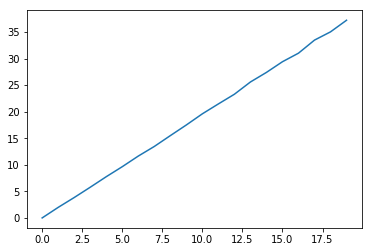

In [16]:
plt.plot(n_face_res)

In [17]:
n_face_res



[0.0,
 1.9846,
 3.8387,
 5.7755,
 7.7584,
 9.6448,
 11.6441,
 13.4524,
 15.4922,
 17.4989,
 19.599,
 21.4611,
 23.2848,
 25.5904,
 27.3938,
 29.4056,
 31.0141,
 33.4755,
 35.0275,
 37.2153]

# Studying 


